# Linear Discriminant Analysis (LDA)

- Linear discriminant analysis (hereafter, LDA) is a popular linear dimensionality reduction technique that can find a linear combination of input features in a lower dimensional space while maximizing class separability.

- Class separability simply means that we keep classes as far as possible while maintaining minimum separation between the data points within each class.

- The better the separation of classes, the easier to draw decision boundaries between the classes to separate (discriminate) groups of data points.

- LDA is often used with classification datasets that have class labels. It can be used both as a binary / multi-class classification (supervised learning) algorithm and a dimensionality reduction (unsupervised learning) algorithm.

- However, class labels are needed for LDA when it is used for dimensionality reduction. Therefore, LDA performs supervised dimensionality reduction.

- The fitted LDA model can be used for both classification and dimensionality reduction.

# PCA vs LDA

- PCA is the most popular dimensionality reduction technique. Both PCA and LDA are considered linear dimensionality reduction techniques as they find a linear combination of input features in the data.

- However, there are notable differences between the two algorithms.

1. PCA performs dimensionality reduction by maximizing the variance of the data. Therefore, in most cases, feature standardization is necessary before applying PCA (see the exceptions here).
2. LDA performs dimensionality reduction by maximizing the class separability of classification datasets. Therefore, feature standardization is optional here (we will verify this shortly).
3. PCA does not require class labels. So, it can be used with classification, regression and even with unlabeled data.
4. LDA reqiuress class labels. So, it is used with classification datasets.
5. PCA finds a set of uncorrelated features in a lower dimensional space. Therefore, PCA automatically removes multicollinearity in the data (learn more here).
6. As explained earlier, LDA can be used for both supervised and unsupervised tasks. PCA can only be used for unsupervised dimensionality reduction.
7. The maximum number of components that PCA can find is equal to the number of input features (original dimensionality) of the dataset! We often prefer to find a considerably low number of components that captures as much of the variance in the original data as possible.
8. The maximum number of components that LDA can find is equal to the number of classes minus one in the classification dataset. For example, if there are only 3 classes in the dataset, LDA can find the maximum of 2 components.
9. LDA is more effective than PCA for classification datasets because LDA reduces the dimensionality of the data by maximizing class separability. It is easier to draw decision boundaries for data with maximum class separability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

# Apply PCA to the Wine data

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine=load_wine()
df=pd.DataFrame(data=wine.data,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df.shape

(178, 13)

In [5]:
X=df
y=wine.target

# Feature standardization

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Running PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

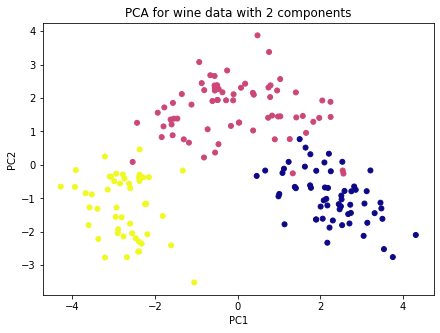

In [10]:
plt.figure(figsize=[7, 5])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=25, cmap='plasma')
plt.title('PCA for wine data with 2 components')
plt.xlabel('PC1')
plt.ylabel('PC2');

- The data appears to be linearly separable with linear decision boundaries (i.e. straight lines). However, some data points would be misclassified. 
- Classes have not been well separated since PCA doesn’t maximize class separability.

In [11]:
exp_var = sum(pca.explained_variance_ratio_ * 100)
print('Variance explained:', exp_var)

Variance explained: 55.40633835693531


- Only about 55.4% of the variance was captured by our PCA model with two components. That much of variance is not good enough to accurately represent the original data.

- Let’s find the optimal number of principal components for the Wine data by creating the following plot. The value should be greater than 2 but less than 13 (number of input features).

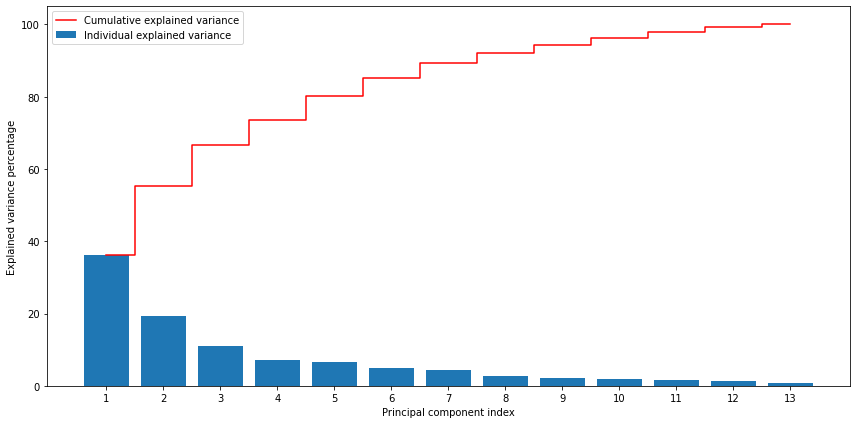

In [12]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.figure(figsize=(12,6))
plt.bar(range(1, 14), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 14), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, 14)))
plt.legend(loc='best')
plt.tight_layout()

- This type of plot is called the cumulative explained variance plot and is extremely useful to find the optimal number of principal components when applying PCA.

- The first six or seven components capture about 85–90% of the variance in the data. So, they will accurately represent the original Wine data. But, for a 2D visualization, we strictly want to use only two components even though they don’t capture much of the variance in the data.

# Apply LDA to the Wine data

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
lda=LinearDiscriminantAnalysis(n_components=2)
x_lda=lda.fit_transform(X_scaled,y)

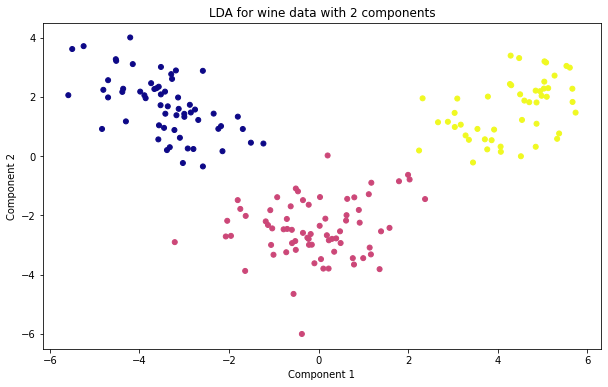

In [15]:
plt.figure(figsize=[10, 6])

plt.scatter(x_lda[:, 0], x_lda[:, 1], c=y, s=25, cmap='plasma')
plt.title('LDA for wine data with 2 components')
plt.xlabel('Component 1')
plt.ylabel('Component 2');

- Now, the classes have been clearly separated since LDA maximizes class separability in addition to reducing dimensionality. The data points will not be misclassified when drawing linear decision boundaries.

- The maximum number of components that LDA can keep for Wine data is also two because there are only three classes in the data. So, these two components should capture all the variance in the data.

In [16]:
exp_var = sum(lda.explained_variance_ratio_ * 100)
print('Variance explained:', exp_var)

Variance explained: 100.0


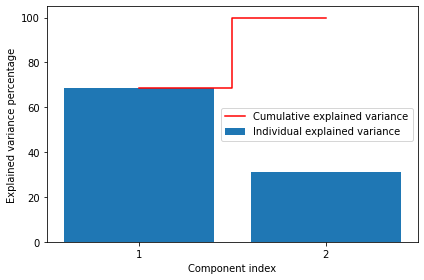

In [17]:
lda = LinearDiscriminantAnalysis(n_components=None)
X_lda = lda.fit(X_scaled, y)

exp_var = lda.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 3), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 3), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Component index')
plt.xticks(ticks=[1, 2])
plt.legend(loc='best')
plt.tight_layout()

- The first two components capture all the variance in the data. So, they fully represent the original Wine data.

# The benefits of the LDA model
- Our LDA model has the following benefits.

1. Reducing the dimensionality (number of features) in the data
2. Visualizing high-dimensional data in a 2D plot
3. Maximizing class separability

In [18]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', decision_function_shape='ovr')
svc.fit(x_lda, y)

SVC(kernel='linear')

In [19]:
y_pred = svc.predict(x_lda)

In [20]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

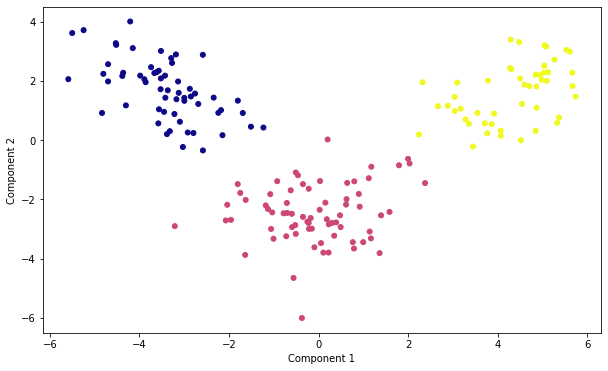

In [33]:
plt.figure(figsize=[10, 6])
plt.scatter(x_lda[:, 0], x_lda[:, 1], c=y_pred, s=25, cmap='plasma')
plt.xlabel('Component 1')
plt.ylabel('Component 2');